<a href="https://colab.research.google.com/github/litimamine/ML/blob/master/7_MGP_ML_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$ MGP - Revenue  Trend Prediction  $$

---
---




## Plotly display setup in colab:

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## Imports: 

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
#import packages
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional


#to plot within the notebook
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

from pymongo import MongoClient 

#Interactive Graphing
import plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

# Make Plotly work in Jupyter Notebook / Colab
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

# Use Plotly locally
cf.go_offline()

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

 # LSTM Model ( Long Short Term Memory ) 

In [ ]:
#importing required libraries for model training 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#read the file
#read the file
connection = MongoClient('localhost', 27017)
db = connection.MGP
datacollection = db.MGP_Daily_Income
test_List = datacollection.find() 
df = pd.read_csv("MGP_Daily_Income.csv")


In [ ]:
# Plotting the total daily possible transactions


#plt.figure(figsize=(14,7))
#plt.title("Total daily possible transaction revenues in TND")
#plt.plot(df['amount'], label='daily possible transactions (TND)')

# Display plotly within a Colab cell
configure_plotly_browser_state()
init_notebook_mode(connected=True)

# total transactions trend - Figure 1

total_trans_trend = go.Figure()

total_trans_trend.add_trace(go.Scatter(x = df.index, y=df['amount'] , mode='lines+markers', name='daily possible transactions (TND)'))


total_trans_trend.update_layout( title='Total daily possible transaction revenues in TND', xaxis_title='Date', yaxis_title='Renenues in TND' , 
                         title_font={'size':22}, title_x=0.5 , title_y = 0.9,
                         xaxis=dict(showline=True, showgrid=False, showticklabels=True, linecolor='rgb(204, 204, 204)', 
                                    linewidth=2, ticks='outside', tickfont=dict( family='Arial', size=12, 
                                                                                color='rgb(82, 82, 82)')),
                         autosize=True, margin=dict(autoexpand=True), showlegend=True, plot_bgcolor='white')



In [ ]:
#Creating dataframe with date and the target variable "amount"
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(data = data, columns=['date','amount'])
new_data.drop(columns='date', inplace=True)

In [ ]:
#extracting values from our dataframe
dataset = new_data.values

#creating train and test sets
train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Creating a list of incrementing x_train & y_train values across time (each Y is predicted using the 30 past X)
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])

#converting X & Y into arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#adding an extra dimention to X train to make it readable by the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [ ]:
# Creating a list of incrementing x_test & y_test values across time (each Y is predicted using the 30 past X)
x_test, y_test = [], []
for i in range(len(train),len(scaled_data)):
    x_test.append(scaled_data[i-30:i,0])
    y_test.append(scaled_data[i,0])

#converting X & Y into arrays
x_test, y_test = np.array(x_test), np.array(y_test)

#adding an extra dimention to X test to make it readable by the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [ ]:
# Create GRU model
model_gru = Sequential()
# Input layer
model_gru.add(GRU (units = 10, return_sequences = True, 
input_shape = [x_train.shape[1], x_train.shape[2]]))
model_gru.add(Dropout(0.2)) 
# Hidden layer
model_gru.add(GRU(units = 5)) 
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units = 1)) 
#Compile model_gru
model_gru.compile(optimizer='adam',loss='mse')
history2 = model_gru.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=1, verbose=1)



Epoch 1/150
170/170 [==============================] - 21s 9ms/step - loss: 0.0589 - val_loss: 0.0574
Epoch 2/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0213 - val_loss: 0.0358
Epoch 3/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0402 - val_loss: 0.0360
Epoch 4/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0172 - val_loss: 0.0349
Epoch 5/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0368
Epoch 6/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0092 - val_loss: 0.0296
Epoch 7/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0205 - val_loss: 0.0241
Epoch 8/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0241
Epoch 9/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0086 - val_loss: 0.0221
Epoch 10/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0070 - val_l

In [ ]:
#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)

#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)


# creating a loop for dynamic x_test selection, that is updated with every y to be predicted across time
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])

# Transforming x_test into an array and extending dimemntions for compatibility purposes with the NN input format
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# predicting Y values and descale them for readability purpose
daily_amount = model_gru.predict(X_test, batch_size=1)
#daily_amount = scaler.inverse_transform(daily_amount)
# Root mean squared error - to evaluate the prediction
valid2=valid
rms=np.sqrt(np.mean(np.power((valid - daily_amount),2)))
rms

4547.125773753312

In [ ]:
#Plotting the trend of the historical daily possible transactions training set, test set, and predicted values in one plot - LSTM
plt.figure(figsize=(14,7))

train = new_data[:200]
valid = new_data[200:]
valid['Predictions'] = scaler.inverse_transform(daily_amount)
daily_amount_gru=daily_amount
#plt.plot(train['amount'])
#plt.plot(valid[['amount','Predictions']])
#plt.title("Total daily possible transaction revenues in TND")


# Display plotly within a Colab cell
configure_plotly_browser_state()
init_notebook_mode(connected=True)

# total transactions trend - Figure 1

total_trans_trend_pred = go.Figure()

total_trans_trend_pred.add_trace(go.Scatter(x = train.index, y=train['amount'] ,
                                            mode='lines+markers', name='Historical daily transactions'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['amount'] ,
                                            mode='lines+markers', name='Actual transactions pattern'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['Predictions'] ,
                                            mode='lines+markers', name='Predicted transactions pattern'))

total_trans_trend_pred.update_layout( title='1-month forecast of total daily possible transactions - GRU Model', 
                                xaxis_title='Date', yaxis_title='Renenues in TND' , 
                                title_font={'size':22}, title_x=0.5 , title_y = 0.9,
                                xaxis=dict(showline=True, showgrid=False, showticklabels=True, 
                                           linecolor='rgb(204, 204, 204)', 
                                           linewidth=2, ticks='outside', tickfont=dict( family='Arial', size=12, 
                                                                                color='rgb(82, 82, 82)')),
                                autosize=True, margin=dict(autoexpand=True), showlegend=True, plot_bgcolor='white')

total_trans_trend_pred

<Figure size 1008x504 with 0 Axes>

In [ ]:
# create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2)) 
model_lstm.add(LSTM(units=5))
model_lstm.add(Dropout(0.2)) 
model_lstm.add(Dense(1))



# compiling the model_lstm using "Adam optimisze" and MSE as a Loss function
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

history = model_lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=1, verbose=1)

# model_lstm summary
model_lstm.summary()

Epoch 1/150
170/170 [==============================] - 6s 9ms/step - loss: 0.0241 - val_loss: 0.0391
Epoch 2/150
170/170 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0316
Epoch 3/150
170/170 [==============================] - 1s 6ms/step - loss: 0.0269 - val_loss: 0.0327
Epoch 4/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0240 - val_loss: 0.0350
Epoch 5/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0113 - val_loss: 0.0366
Epoch 6/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0193 - val_loss: 0.0412
Epoch 7/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0212 - val_loss: 0.0516
Epoch 8/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0446
Epoch 9/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0197 - val_loss: 0.0414
Epoch 10/150
170/170 [==============================] - 1s 5ms/step - loss: 0.0150 - val_lo

In [ ]:
#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)

#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)


# creating a loop for dynamic x_test selection, that is updated with every y to be predicted across time
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])

# Transforming x_test into an array and extending dimemntions for compatibility purposes with the NN input format
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# predicting Y values and descale them for readability purpose
daily_amount = model_lstm.predict(X_test, batch_size=1)
#daily_amount = scaler.inverse_transform(daily_amount)
# Root mean squared error - to evaluate the prediction
valid=valid2
rms=np.sqrt(np.mean(np.power((valid - daily_amount),2)))
rms

4547.092126290146

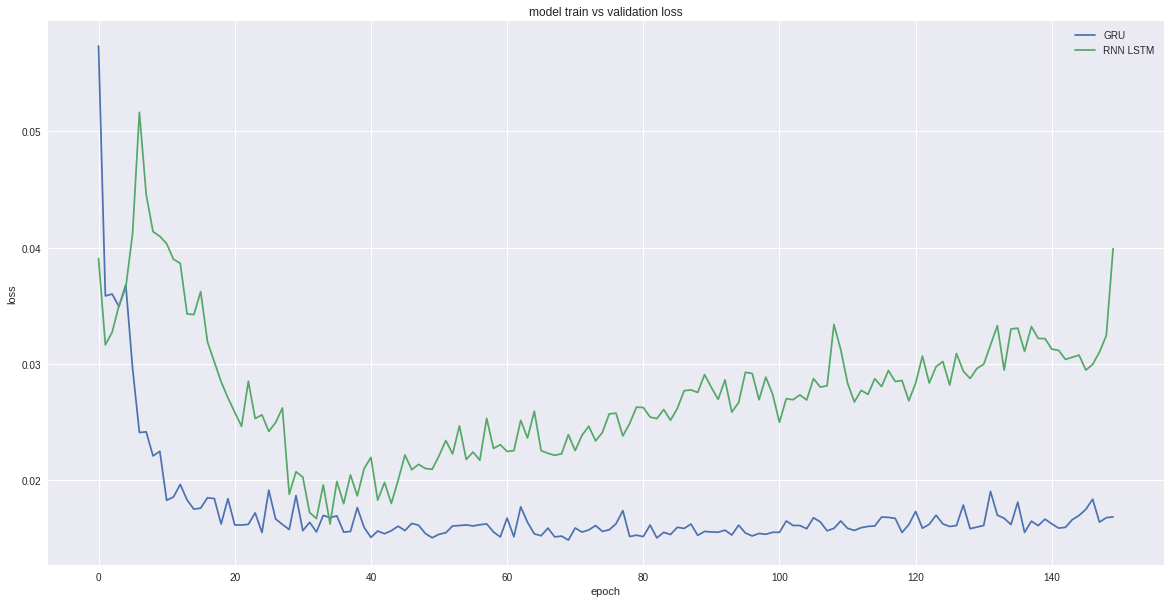

In [ ]:
# plot train and validation loss
from matplotlib import pyplot

pyplot.plot(history2.history['val_loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['GRU', 'RNN LSTM'], loc='upper right')
pyplot.show()

In [ ]:
t=pd.DataFrame(history2.history['val_loss'])
t.reset_index
t['epoch']=t.index
t.rename(columns={0:'val_loss'},inplace=True)


t=t.sort_values(by = 'val_loss', ascending=True)
epoch_val=int(t.iloc[0,1])
if epoch_val==0:
    epoch_val=10

In [ ]:
#Plotting the trend of the historical daily possible transactions training set, test set, and predicted values in one plot - LSTM
plt.figure(figsize=(14,7))

train = new_data[:200]
valid = new_data[200:]
valid['Predictions LSTM'] = scaler.inverse_transform(daily_amount)
valid['Predictions GRU'] = scaler.inverse_transform(daily_amount_gru)

#plt.plot(train['amount'])
#plt.plot(valid[['amount','Predictions']])
#plt.title("Total daily possible transaction revenues in TND")


# Display plotly within a Colab cell
configure_plotly_browser_state()
init_notebook_mode(connected=True)

# total transactions trend - Figure 1

total_trans_trend_pred = go.Figure()

total_trans_trend_pred.add_trace(go.Scatter(x = train.index, y=train['amount'] ,
                                            mode='lines+markers', name='Historical daily transactions'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['amount'] ,
                                            mode='lines+markers', name='Actual transactions pattern'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['Predictions LSTM'] ,
                                            mode='lines+markers', name='Predicted transactions pattern'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['Predictions GRU'] ,
                                            mode='lines+markers', name='Predicted transactions pattern'))

total_trans_trend_pred.update_layout( title='1-month forecast daily transactions - Comparision Between GRU and LSTM Models', 
                                xaxis_title='Date', yaxis_title='Renenues in TND' , 
                                title_font={'size':22}, title_x=0.5 , title_y = 0.9,
                                xaxis=dict(showline=True, showgrid=False, showticklabels=True, 
                                           linecolor='rgb(204, 204, 204)', 
                                           linewidth=2, ticks='outside', tickfont=dict( family='Arial', size=12, 
                                                                                color='rgb(82, 82, 82)')),
                                autosize=True, margin=dict(autoexpand=True), showlegend=True, plot_bgcolor='white')

total_trans_trend_pred

In [ ]:
#extracting values from our dataframe (train on all the data)
train = new_data.values


#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Creating a list of incrementing x_train & y_train values across time (each Y is predicted using the 30 past X)
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])

#converting X & Y into arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#adding an extra dimention to X train to make it readable by the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [ ]:
# Create GRU model
model = Sequential()
# Input layer
model.add(GRU (units = 10, return_sequences = True, 
input_shape = [x_train.shape[1], x_train.shape[2]]))
model.add(Dropout(0.2)) 
# Hidden layer
model.add(GRU(units = 10)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
#Compile model
model.compile(optimizer='adam',loss='mse')
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch_val, batch_size=1, verbose=1)

Epoch 1/69
204/204 [==============================] - 4s 8ms/step - loss: 0.0165 - val_loss: 0.0278
Epoch 2/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0153 - val_loss: 0.0279
Epoch 3/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0160 - val_loss: 0.0235
Epoch 4/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0106 - val_loss: 0.0229
Epoch 5/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0109 - val_loss: 0.0191
Epoch 6/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0195
Epoch 7/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0180
Epoch 8/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0164
Epoch 9/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.0173
Epoch 10/69
204/204 [==============================] - 1s 5ms/step - loss: 0.0144 - val_loss: 0.0157

In [ ]:
#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)

#extracting values from the training set, with unconsidering the last 30 values as they intervene in the prediction of the first y_test values
inputs = new_data[len(new_data) - len(valid) - 30:].values

#Flattening the array (converting a multidimensional array into a 1D array ) 
inputs = inputs.reshape(-1,1)

#Scaling the data
inputs  = scaler.transform(inputs)


# creating a loop for dynamic x_test selection, that is updated with every y to be predicted across time
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])

# Transforming x_test into an array and extending dimemntions for compatibility purposes with the NN input format
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# predicting Y values and descale them for readability purpose
daily_amount = model.predict(X_test, batch_size=1)


#Plotting the trend of the historical daily possible transactions training set, test set, and predicted values in one plot - LSTM
plt.figure(figsize=(14,7))

train = new_data[:200]
valid = new_data[200:]
valid['Predictions'] = scaler.inverse_transform(daily_amount)

#plt.plot(train['amount'])
#plt.plot(valid[['amount','Predictions']])
#plt.title("Total daily possible transaction revenues in TND")


# Display plotly within a Colab cell
configure_plotly_browser_state()
init_notebook_mode(connected=True)

# total transactions trend - Figure 1

total_trans_trend_pred = go.Figure()

total_trans_trend_pred.add_trace(go.Scatter(x = train.index, y=train['amount'] ,
                                            mode='lines+markers', name='Historical daily transactions'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['amount'] ,
                                            mode='lines+markers', name='Actual transactions pattern'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['Predictions'] ,
                                            mode='lines+markers', name='Predicted transactions pattern'))

total_trans_trend_pred.update_layout( title='1-month forecast of possible transactions - Tuned GRU Model', 
                                xaxis_title='Date', yaxis_title='Renenues in TND' , 
                                title_font={'size':22}, title_x=0.5 , title_y = 0.9,
                                xaxis=dict(showline=True, showgrid=False, showticklabels=True, 
                                           linecolor='rgb(204, 204, 204)', 
                                           linewidth=2, ticks='outside', tickfont=dict( family='Arial', size=12, 
                                                                                color='rgb(82, 82, 82)')),
                                autosize=True, margin=dict(autoexpand=True), showlegend=True, plot_bgcolor='white')

total_trans_trend_pred

<Figure size 1008x504 with 0 Axes>

In [ ]:
inputs = new_data[len(new_data) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

curr = []
curr.append(inputs[0:30,0])
pred_df= []
pred_df.append(curr)

# creating a loop for dynamic x_test selection, that is updated with every y to be predicted across time
curr = []
curr.append(inputs[0:30,0])
#save curr to pred df
for i in range(30):
    #print(i)
    curr1 = np.array(curr)
    curr1 = np.reshape(curr1, (1,30,1))
    curr=np.insert(curr,30,float(model.predict(curr1, batch_size=1)))[1:]
    pred_df.append(curr)

pred_df[30]=pred_df[30].reshape((30, 1))
pred_30=scaler.inverse_transform(pred_df[30])
new_data['date']=new_data.index
a=new_data.tail(1)
pred_30_dates= pd.date_range(a.iloc[0,1], periods=31)[1:]


In [ ]:
#Plotting the trend of the historical daily possible transactions training set, test set, and predicted values in one plot - LSTM
#Plotting the trend of the historical daily possible transactions training set, test set, and predicted values in one plot - LSTM
plt.figure(figsize=(14,7))

train = new_data
valid = new_data[0:30]
valid.index=pred_30_dates
valid['Predictions'] = pred_30

#plt.plot(train['amount'])
#plt.plot(valid[['amount','Predictions']])
#plt.title("Total daily possible transaction revenues in TND")


# Display plotly within a Colab cell
configure_plotly_browser_state()
init_notebook_mode(connected=True)

# total transactions trend - Figure 1

total_trans_trend_pred = go.Figure()

total_trans_trend_pred.add_trace(go.Scatter(x = train.index, y=train['amount'] ,
                                            mode='lines+markers', name='Historical daily transactions'))

total_trans_trend_pred.add_trace(go.Scatter(x = valid.index, y=valid['Predictions'] ,
                                            mode='lines+markers', name='Predicted transactions pattern'))

total_trans_trend_pred.update_layout( title='1-month forecast of total daily possible transactions - LSTM Model', 
                                xaxis_title='Date', yaxis_title='Renenues in TND' , 
                                title_font={'size':22}, title_x=0.5 , title_y = 0.9,
                                xaxis=dict(showline=True, showgrid=False, showticklabels=True, 
                                           linecolor='rgb(204, 204, 204)', 
                                           linewidth=2, ticks='outside', tickfont=dict( family='Arial', size=12, 
                                                                                color='rgb(82, 82, 82)')),
                                autosize=True, margin=dict(autoexpand=True), showlegend=True, plot_bgcolor='white')

total_trans_trend_pred


<Figure size 1008x504 with 0 Axes>

In [ ]:
import plotly
import pandas as pd

import json
# function to upload plot to mongodb
def uploadg_plot_mongo(plot,name):
    connection = MongoClient('localhost', 27017)
    db = connection.Plots
    collection = db[name]
    div =json.loads(plot.write_json())
    collection.drop()
    collection.insert_one(div)

#uploadg_plot_mongo(uploadg_plot_mongo,'#MGP_forecast')

## Saving the tuned model


In [ ]:
model.save("MGP_LSTM_Trained")

# It can be used to reconstruct the model identically.
# remove the (#) to importthe trained model

# reconstructed_model = keras.models.load_model("MGP_LSTM_Trained")

INFO:tensorflow:Assets written to: MGP_LSTM_Trained/assets


INFO:tensorflow:Assets written to: MGP_LSTM_Trained/assets
